In [19]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os

from shapely.geometry import Point
from geopandas.tools import sjoin

PARQA = os.getenv('PARQA')

In [20]:
def toGeoDataFrame(df, lat='lat',lon='lon'):
    '''dataframe to geodataframe'''
    df[lat].replace(0, np.nan)
    df[lon].replace(0, np.nan)
    df = df[pd.notnull(df[lat])]

    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df

In [21]:
df = pd.read_csv(PARQA + 'data/DPR_property/golf_courses.csv', index_col=0, encoding='utf-8')

In [22]:
df.head(2)

,GISPROPNUM,BOROUGH,NAME,NYS_ASSEMB,NYS_SENATE,US_CONGRES,SHAPE_STAr,SHAPE_STLe,lat,lon
SYSTEM,,,,,,,,,,
Q010-GLF0002,Q010,Q,Clearview Golf Course,26,11,3,5161648.013930,10086.167188,40.787050,-73.789443
Q099-GLF0004,Q099,Q,Putt-Putt Golf Course,"35, 27",13,14,541943.487778,4311.121593,40.745303,-73.842700


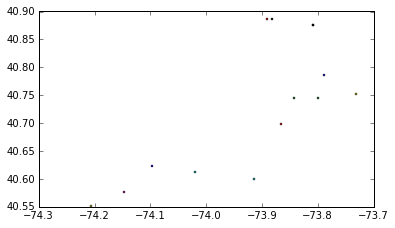

In [23]:
df = toGeoDataFrame(df)
df.plot()

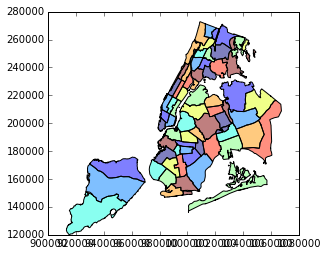

In [24]:
pDistricts = gp.read_file(PARQA + 'data/SHP/Park_Districts/ParkDistrict.shp')
pD = pDistricts[['SYSTEM','geometry']]
pD.plot()

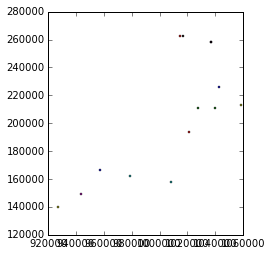

In [25]:
df = df.to_crs(pDistricts.crs)
df.plot()

In [26]:
dfD = sjoin(df, pD, how="left").rename(columns={'SYSTEM':'parkDistrict'}).to_crs(epsg=4326)

In [27]:
len(dfD[pd.isnull(dfD.parkDistrict)])

14

In [48]:
def writeGeoJson(gdf,path):
    '''writes df as json'''
    with open(path,'w') as jsFile:
        jsFile.write(gdf.to_json())

In [49]:
writeGeoJson(dfD, PARQA +'data/DPR_property/csv_ll_pD/golf_courses_pd_ll.geojson')